<a href="https://colab.research.google.com/github/HinePo/diabetes-ML-and-DL-study/blob/master/Generic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Description

This notebook applies some machine learning and deep learning algorithms and techniques to predict if a person has diabetes or not. It is contained: 

1. Applications for many algorithms
2. Graph/Plot accuracy from models
3. Training the best model
4. Predictions 

Dataset can be found in
https://www.kaggle.com/uciml/pima-indians-diabetes-database


Since this is not intended to be a data pre-processing material, I chose a nice and clean dataset, that will save some time. It is also very small, only 23 KB, and 768 rows and 9 columns. But it will do ok as a generic example to make AI predictions.


The ideia is to make it easier to do AI analysis and predictions on any clean enough datasets. It can also be useful once you've already done the data cleaning and features selection processes.

You should be able to use this notebook on any other csv dataset, just by:
1. importing a differente file
2. keeping the names of the variables
3. selecting different features and target from the dataset

Some awesome datasets are available on Kaggle: https://www.kaggle.com/data

Happy coding,

HinePo.


#### Importing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

#### Loading dataset

In [0]:
# loading csv file
# Make sure the path below is where the csv file is (where you uploaded the file)


# you can also mount your drive on left menu:
# copy csv file/dataset to a folder in your google drive 
# on google colab go to the left menu, click Files, and then locate the file on your google drive folder
# right click it and copy path. then change the string below by pasting the path
names = ['Pregnancies' ,'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome' ]
df = pd.read_csv('/content/drive/My Drive/Colab Files/diabetes.csv', names = names)

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.shape

(768, 9)

In [0]:
# loading csv via numpy
# optional. another way to load the data
# ds = np.loadtxt('/content/drive/My Drive/Colab Files/diabetes.csv', delimiter = ',')
# ds.shape

# slice:
# X = ds[:,0:8]
# y = ds[:,8]

The dataset is pretty clean, so it will save a bit of time with handling the data.

### Defining features and target

In [0]:
# use the dataframe variable to create an array with the columns names 
all_vars = np.array(df.columns)
all_vars

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigree', 'Age', 'Outcome'],
      dtype=object)

We will use the following eight variables to predict diabetes:

- Number of times pregnant
- Glucose
- Blood pressure
- Skin thickness
- Insulin
- Body mass index
- Diabetes pedigree function
- Age

In [0]:
# now that we have an array, we can slice it to define the features variable
# features: columns the classifier will use to predict
features = np.array(all_vars[0:8])
features

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigree', 'Age'], dtype=object)

Outcome column will be the target/predicted variable.
Outcome = 0 : healthy
Outcome = 1 : diabetes predicted

In [0]:
# define target variable
# target: column we want to predict
target = np.array(all_vars[8])
target

array('Outcome', dtype='<U7')

### Splitting the dataset

In [0]:
# split dataset using arrays as filters
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2,
                                                      stratify = df[target], random_state = 0)

In [0]:
# Creating variables to store the results
all_models = np.array([])
all_scores = np.array([])

In [0]:
all_models

array([], dtype=float64)

### Evaluation functions

In [0]:
# define function to evaluate confusion matrix, after we call the fit method on the chosen algorithm

def acc_cm(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

### 1.Support Vector Machine (SVM)

Link for documentation:
https://scikit-learn.org/stable/modules/svm.html

In [0]:
from sklearn.svm import LinearSVC

In [0]:
# creating function to do some tests with svm model and print average score

def svm_test(X_train, y_train, cv = 10):
  np.random.seed(0)
  svc = LinearSVC()
  # cv_scores = cross_val_score(svc, X_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  cv_scores = cross_val_score(svc, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of ', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [0]:
# calling svm_test and storing cv_scores.mean() on res variable
res = svm_test(X_train, y_train)

Average of  10 tests:  0.5684822845055526


In [0]:
# updating results
# if you run this cell more than once, you should change the name (string) below
# so we won't have duplicated models on the plot (Comparing Models section)
all_models = np.append(all_models, "SVM")
all_scores = np.append(all_scores, res)

In [0]:
all_models

array(['SVM'], dtype='<U32')

### 2.Extra Trees Classifier

Link for documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
def ext_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  ext = ExtraTreesClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state = 0, n_jobs = -1)
  cv_scores = cross_val_score(ext, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  # cv_scores = cross_val_score(ext, X_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  print('Average of ', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [0]:
# calling etc_test and storing cv_scores.mean() on res variable
res = ext_test(X_train, y_train)

Average of  10 tests:  0.7296404019037546


In [0]:
# updating results
# if you run this cell more than once, you should change the name (string) below
# so we won't have duplicated models on the plot (Comparing Models section)
all_models = np.append(all_models, "ETC")
all_scores = np.append(all_scores, res)

### 3.Random Forest Classifier

Link for documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# defining random forest function to call the classifier

def rfc_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  rfc = RandomForestClassifier(n_estimators = n_estimators, random_state = 0, n_jobs = -1)
  # cv_scores = cross_val_score(rfc, X_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  cv_scores = cross_val_score(rfc, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of ', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [0]:
# calling rfc_test and storing cv_scores.mean() on res variable
res = rfc_test(X_train, y_train)

Average of  10 tests:  0.7460074034902169


In [0]:
# updating results
# if you run this cell more than once, you should change the name (string) below
# so we won't have duplicated models on the plot (Comparing Models section)
all_models = np.append(all_models, "RFC")
all_scores = np.append(all_scores, res)

### 4.XGBClassifier

Link for documentation: https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [0]:
from xgboost import XGBClassifier

In [0]:
def xgbc_test(X_train, y_train, n_estimators = 100, cv = 10):
  np.random.seed(0)
  xgb = XGBClassifier()
  # cv_scores = cross_val_score(rfc, X_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  cv_scores = cross_val_score(xgb, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of ', cv, 'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [0]:
# calling xgbc_test and storing cv_scores.mean() on res variable
res = xgbc_test(X_train, y_train)

Average of  10 tests:  0.7492596509783183


In [0]:
# updating results
# if you run this cell more than once, you should change the name (string) below
# so we won't have duplicated models on the plot (Comparing Models section)
all_models = np.append(all_models, "XGB")
all_scores = np.append(all_scores, res)

### 5.Multi-Layer Percetron (MLP)

Link for documentation: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
def mlp_test(X_train, y_train, cv = 10):
  np.random.seed(0)

  mlp = MLPClassifier()
  scaler = StandardScaler()

  pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

  # cv_scores = cross_val_score(pipe, X_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  cv_scores = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1)
  print('Average of ', cv,  'tests: ', cv_scores.mean())
  return cv_scores.mean()

In [0]:
# calling mlp_test and storing cv_scores.mean() on res variable
res = mlp_test(X_train, y_train)

Average of  10 tests:  0.750846113167636


In [0]:
# updating results
# if you run this cell more than once, you should change the name (string) below
# so we won't have duplicated models on the plot (Comparing Models section)
all_models = np.append(all_models, "MLP")
all_scores = np.append(all_scores, res)

### 6.Keras Sequential Model

Link for documentation: https://keras.io/guides/sequential_model/

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [0]:
# define the keras model
model = Sequential()
# 8 input features (input_dim)
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(6, activation='relu'))
# last layer must be activated with sigmoid or softmax since we want results in (0, 1) range (probabilities)
model.add(Dense(1, activation='sigmoid'))

# compile the keras model, choose metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[tf.keras.metrics.AUC()])


In [0]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, verbose = 0)

In [0]:
# evaluate model
test_loss, res = model.evaluate(X_test, y_test)

154/154 [==============================] - 0s 149us/step


In [0]:
res

0.6753246784210205

In [0]:
# updating results
# if you run this cell more than once, you should change the name (string) below
# so we won't have duplicated models on the plot (Comparing Models section)
all_models = np.append(all_models, "Keras")
all_scores = np.append(all_scores, res)

In [0]:
test_loss

0.6214500572774317

In [0]:
# predict classes with the model
# class 0 : no diabetes 
# class 1 : diabetes predicted :(
predict_class = model.predict_classes(X_test)
predict_class[0:15]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=int32)

In [0]:
# predict probabilities on test data
y_pred = model.predict(X_test)
y_pred[0:5]

array([[0.11955559],
       [0.12144232],
       [0.04039523],
       [0.16181973],
       [0.4358194 ]], dtype=float32)

In [0]:
# we will need this to calculate confusion matrix
rounded = [round(x[0]) for x in y_pred]
rounded[0:20]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [0]:
# summarize the first n cases
n = 5
for i in range(n):
	print('%s => \n %d (expected %d)\n\n' % (X_test.iloc[i, ].tolist(), rounded[i], y_test.iloc[i]))

[2.0, 56.0, 56.0, 28.0, 45.0, 24.2, 0.332, 22.0] => 
 0 (expected 0)


[1.0, 92.0, 62.0, 25.0, 41.0, 19.5, 0.48200000000000004, 25.0] => 
 0 (expected 0)


[1.0, 100.0, 74.0, 12.0, 46.0, 19.5, 0.149, 28.0] => 
 0 (expected 0)


[7.0, 97.0, 76.0, 32.0, 91.0, 40.9, 0.871, 32.0] => 
 0 (expected 1)


[6.0, 151.0, 62.0, 31.0, 120.0, 35.5, 0.6920000000000001, 28.0] => 
 0 (expected 0)




In [0]:
# input to confusion_matrix must be an array of int (rounded)

# obviously, we can only call confusion_matrix once we already called the fit method on the model
matrix = confusion_matrix(y_test, rounded)

In [0]:
matrix

array([[87, 13],
       [37, 17]])

In [0]:
# printing the accuracy using function defined in 'Evaluation functions' section
print("Accuracy of Keras Sequential model : ''", acc_cm(matrix))

Accuracy of Keras Sequential model : '' 0.6753246753246753


### Comparing Models

In [0]:
# check models array
all_models

array(['SVM', 'ETC', 'RFC', 'XGB', 'MLP', 'Keras'], dtype='<U32')

In [0]:
# check scores array
all_scores

array([0.56848228, 0.7296404 , 0.7460074 , 0.74925965, 0.75084611,
       0.67532468])

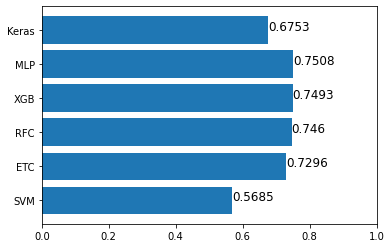

In [0]:
# plot model results

fig, ax = plt.subplots()
ax.barh(all_models, all_scores)
plt.xlim(0, 1)
for index, value in enumerate(all_scores):
    plt.text(value, index, str(round(value, 4)), fontsize = 12)

In [0]:
best_model = all_models[all_scores.argmax()]

In [0]:
# this is just a string, it doesn't contain the model parameters
best_model

'MLP'

### Training best model

In [0]:
# Defining model
mlp = MLPClassifier()

# using a scaler, since it is a neural network
scaler = StandardScaler()

# creating the pipeline with scaler and then MLP
pipe = Pipeline([('scaler', scaler), ('mlp', mlp)])

In [0]:
# fit/train the algorithm on the train data
pipe.fit(X_train, y_train)

In [0]:
# predict classes with the model
# class 0 : no diabetes 
# class 1 : diabetes predicted :(
y_pred = pipe.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [0]:
pipe.predict_proba(X_train)

array([[0.0612002 , 0.9387998 ],
       [0.96826612, 0.03173388],
       [0.82531213, 0.17468787],
       ...,
       [0.98483684, 0.01516316],
       [0.59535529, 0.40464471],
       [0.46886409, 0.53113591]])

In [0]:
# now that we trained (fit) the model, we can calculate the confusion matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[90, 17],
       [10, 37]])

In [0]:
res = pipe.score(X_test, y_test)
res

0.8246753246753247

In [0]:
# printing the accuracy using function defined in 'Evaluation functions' section
print("Accuracy of MLPClassifier : ''", acc_cm(cm))

Accuracy of MLPClassifier : '' 0.8246753246753247


In [0]:
# updating results (appending trained model)
# if you run this cell more than once, you should change the name (string) below
# so we won't have duplicated models on the plot (Comparing Models section)
all_models = np.append(all_models, "MLP (trained)")
all_scores = np.append(all_scores, res)

In [0]:
all_models

array(['SVM', 'ETC', 'RFC', 'XGB', 'MLP', 'Keras', 'MLP (trained)'],
      dtype='<U32')

In [0]:
all_scores

array([0.56848228, 0.7296404 , 0.7460074 , 0.74925965, 0.75084611,
       0.67532468, 0.82467532])

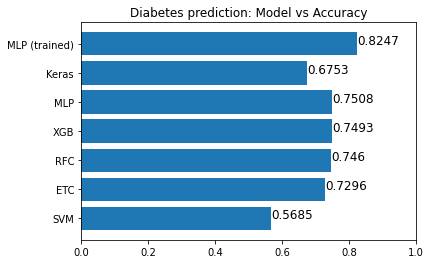

In [0]:
# plot model results with trained model

fig, ax = plt.subplots()
ax.barh(all_models, all_scores)
plt.xlim(0, 1)
plt.title("Diabetes prediction: Model vs Accuracy")
for index, value in enumerate(all_scores):
    plt.text(value, index, str(round(value, 4)), fontsize = 12)

### Conclusions

This notebook is intended to help with preliminar AI modeling and to make it easier to do some quick tests on a csv dataset, using some of the most popular machine learning and deep learning algorithms at the moment. It is preliminary analysis because it doesn't address hyperparameter optimization for the models yet.


Hopefully this notebook will help people to predict variables on any tidy dataset. As mentioned, this is focused on the algorithms applications, and not on the data wrangling or feature selection, which are also very impactull on the model results.